# Predicting Price with Size

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In this project, you're working for a client who wants to create a model that can predict the **price** of apartments in the city of Buenos Aires — with a focus on **apartments** that cost **less than $400,000 USD.**

## Prepare Data

### Import

In the previous project, we cleaned our data files one-by-one. This isn't an issue when you're working with just three files, but imagine if you had several hundred! One way to automate the data importing and cleaning process is by writing a function. This will make sure that all our data undergoes the same process, and that our analysis is easily reproducible — something that's very important in science in general and data science in particular.

1. Add to your wrangle function so that the DataFrame it returns **only includes apartments** in Buenos Aires ("Capital Federal") that cost **less than $400,000 USD**. Then recreate df from data/buenos-aires-real-estate-1.csv by re-running the cells above. - A way to to create subsets from a larger dataset is through masking. Masks are ways to filter out the data you're not interested in so that you can focus on the data you are.

2. All observations should fall between the `0.1` and `0.9` quantiles for `"surface_covered_in_m2"`.

In [45]:
def wrangle(filepath):
    
    # read csv file
    df = pd.read_csv(filepath)
    
    # subset data: apartments in "capital federal", Less than 400,000
    mask_ba = df['place_with_parent_names'].str.contains("Capital Federal")
    mask_apt = df['property_type'] == 'apartment'
    mask_price = df["price_aprox_usd"] < 400_000
    
    # Once we have our masks, we can use it to select all the rows from df that evaluate as True for mask_ba & mask_apt & mask_price.
    df = df[mask_ba & mask_apt & mask_price]
    
    # subset data: removw outliers for 'surface_covered_in_m2'
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    df = df[mask_area]
    
    return df

use the wrangle function to create a dataframe

In [46]:
df = wrangle("data/buenos-aires-real-estate-1.csv")
print("df shape: ", df.shape)
df

df shape:  (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.60,129000.00,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.80,87000.00,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.20,118000.00,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.80,57000.00,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.00,90000.00,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450,http://once.properati.com.ar/suwa_venta_depart...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,sell,apartment,|Argentina|Capital Federal|Barracas|,"-34.631591,-58.370191",1118100.0,ARS,1114996.65,73536.95,49.0,42.0,1500.754082,26621.428571,3.0,1.0,NaN,http://barracas.properati.com.ar/npf1_venta_de...
8590,sell,apartment,|Argentina|Capital Federal|Almagro|,"-34.6045547,-58.4182063",119000.0,USD,1804325.60,119000.00,46.0,41.0,2586.956522,2902.439024,NaN,NaN,NaN,http://almagro.properati.com.ar/ea4d_venta_dep...
8593,sell,apartment,|Argentina|Capital Federal|Barracas|,"-34.6240024,-58.3905883",62000.0,USD,940068.80,62000.00,NaN,43.0,NaN,1441.860465,NaN,2.0,NaN,http://barracas.properati.com.ar/oc61_venta_de...
8601,sell,apartment,|Argentina|Capital Federal|San Nicolás|,"-34.601455,-58.378132",125000.0,USD,1895300.00,125000.00,NaN,70.0,NaN,1785.714286,2.0,3.0,NaN,http://san-nicolas.properati.com.ar/1004t_vent...


## Explore

We saw in the previous project that property size is an important factor in determining price. With that in mind, let's look at the distribution of apartment sizes in our dataset.

### Histogram

Create a histogram of `"surface_covered_in_m2"`. Make sure that the x-axis has the label `"Area [sq meters]"` and the plot has the title `"Distribution of Apartment Sizes"`.

Text(0, 0.5, 'Distribution of Apartment Sizes')

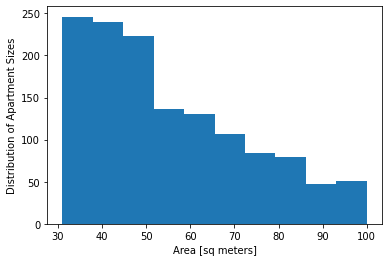

In [47]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Distribution of Apartment Sizes")

In [48]:
df["surface_covered_in_m2"].describe()

count    1343.000000
mean       55.076694
std        18.160427
min        31.000000
25%        40.000000
50%        50.000000
75%        68.500000
max       100.000000
Name: surface_covered_in_m2, dtype: float64

The describe statistics above confirm what we suspected. While most of the apartments in our dataset are smaller that 73 square meters, there are some that are several thousand square meters. The best thing to do is to change our `wrangle` function and remove them from the dataset. 

    count     1551.000000
    mean       100.742747
    std       1573.992927
    min          0.000000
    25%         39.000000
    50%         51.000000
    75%         74.500000
    max      62034.000000
    Name: surface_covered_in_m2, dtype: float64
    
Add to your wrangle function so that it removes observations that are outliers in the `"surface_covered_in_m2"` column. Specifically, all observations should fall between the `0.1` and `0.9` quantiles for `"surface_covered_in_m2"`.

When you're done, don't forget to rerun all the cells above. Note how your histogram changes now that there are no outliers. At this point, `df` should have no more than 1,343 observations.

### Scatter Plot

Create a scatter plot that shows price (`"price_aprox_usd"`) vs area (`"surface_covered_in_m2"`) in our dataset. Make sure to label your x-axis `"Area [sq meters]"` and your y-axis `"Price [USD]"`.

Text(0, 0.5, 'Price [USD]')

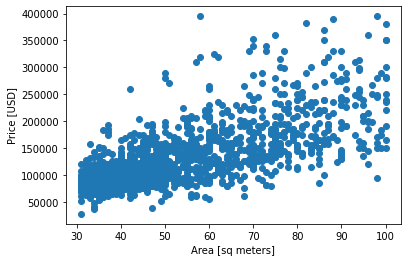

In [49]:
plt.scatter(df["surface_covered_in_m2"], df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")

This plot suggests that there's a moderate positive correlation between apartment price and size. This means that if  thing we want to predict is price, size will be a good feature to include. 

## Split

A key part in any model-building project is separating your **target** (the thing you want to predict) from your **features** (the information your model will use to make its predictions). Since this is our first model, we'll use just one feature: apartment size.

Create the feature matrix named `X_train`, which you'll use to train your model. It should contain one feature only: `["surface_covered_in_m2"]`. Remember that your feature matrix should always be two-dimensional. 

In [50]:
# Create a DataFrame from a Series in pandas.

features = ["surface_covered_in_m2"]      
X_train = df[features]

Create the target vector named `y_train`, which you'll use to train your model. Your target should be `"price_aprox_usd"`. Remember that, in most cases, your target vector should be **one-dimensional**.

In [51]:
# Select a Series from a DataFrame in pandas.

target = "price_aprox_usd"
y_train = df[target]

In [56]:
print(type(X_train), type(y_train))
print(X_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(1343, 1) (1343,)


## Build Model

### Baseline

The first step in building a model is baselining. To do this, ask yourself how you will know if the model you build is performing well?" One way to think about this is to see how a "dumb" model would perform on the same data. Some people also call this a naïve or baseline model, but it's always a model makes only one prediction — in this case, it predicts the same price regardless of an apartment's size. So let's start by figuring out what our baseline model's prediction should be. 

In [55]:
# using the mean of the y_train

y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[135527.83871928515,
 135527.83871928515,
 135527.83871928515,
 135527.83871928515,
 135527.83871928515]

So how does our baseline model perform? One way to evaluate it is by plotting it on top of the scatter plot we made above. 

Add a line to the plot below that shows the relationship between the observations `X_train` and our dumb model's predictions `y_pred_baseline`. Be sure that the line color is orange, and that it has the label `"Baseline Model"`.

Text(0.5, 1.0, 'Buenos Aires: Price vs. Area')

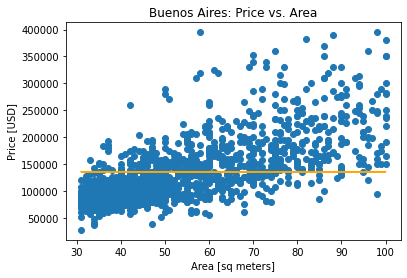

In [59]:
plt.plot(X_train, y_pred_baseline, color='orange', label="Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")

Looking at this visualization, it seems like our baseline model doesn't really follow the trend in the data. But, as a data scientist, you can't depend only on a subjective plot to evaluate a model. You need an exact, mathematically calculate **performance metric**. There are lots of performance metrics, but the one we'll use here is the **mean absolute error**.  

Calculate the baseline mean absolute error for your predictions in `y_pred_baseline` as compared to the true targets in `y`.

In [63]:
from sklearn.metrics import mean_absolute_error

mae_baseline = mean_absolute_error(y_pred_baseline, y_train)
print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 135527.84
Baseline MAE: 45199.46


What does this information tell us? If we always predicted that an apartment price is \\$135,527.84, our predictions would be off by an average of \\$45,199.46. It also tells us that our model needs to have mean absolute error below \\$45,199.46 in order to be useful. 

## Iterate

The next step in building a model is iterating. This involves building a model, training it, evaluating it, and then repeating the process until you're happy with the model's performance. Even though the model we're building is linear, the iteration process rarely follows a straight line. Be prepared for trying new things, hitting dead-ends, and waiting around while your computer does long computations to train your model. ☕️ Let's get started! 

The first thing we need to do is create our model — in this case, one that uses linear regression. 

In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()